<a href="https://colab.research.google.com/github/Adhiksha007/AI-Bootcamp/blob/main/Image%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


In [8]:
# load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convert the labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# Build CNN model
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D and add a Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons for 10 digit classes
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc * 100}%")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.8639 - loss: 0.4223 - val_accuracy: 0.9839 - val_loss: 0.0530
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9833 - loss: 0.0556 - val_accuracy: 0.9869 - val_loss: 0.0401
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9903 - val_loss: 0.0293
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 60ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9899 - val_loss: 0.0310
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 58ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9894 - val_loss: 0.0352
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9846 - loss: 0.0473
Test accuracy: 98.94000291824341%


In [28]:
# Make predictions on test images
predictions = model.predict(test_images)
print(f"Predictions for first test images: {np.argmax(predictions[1])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Predictions for first test images: 2


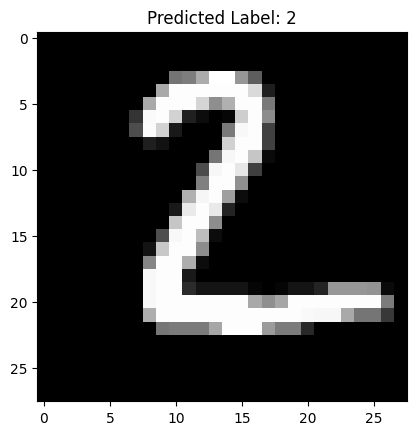

In [29]:
plt.imshow(test_images[1].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predictions[1].argmax()}")
plt.show()